In [22]:
import os 
import lmdb
import pickle

def load_lmdb(lmdb_path):
    """
    load_lmdb
    """
    lmdb_path = os.path.join(lmdb_path)
    env = lmdb.open(
        lmdb_path,
        max_readers=32,
        readonly=True,
        lock=False,
        readahead=False,
        meminit=False,
    )
    return env

def read_all_data(env):
   
    allFile = []
    with env.begin() as txn:
        with txn.cursor() as cursor:
            for key, value in cursor:
                key_str = key.decode('utf-8')
                if key_str != "className":
                    allFile.append(key_str)
    return allFile


def getChar(env,key):
    with env.begin() as txn:
        value_bytes = txn.get(key.encode('utf-8'))
        path = pickle.loads(value_bytes)
        print(path)
    return path

env=load_lmdb("./LMDB/lmdb/")

data=read_all_data(env)
print(data)






['001.pot_4E00', '001.pot_4E01', '001.pot_4E03', '001.pot_4E07', '001.pot_4E08', '001.pot_4E09', '001.pot_4E0A', '001.pot_4E0B', '001.pot_4E0D', '001.pot_4E0E', '001.pot_4E10', '001.pot_4E11', '001.pot_4E13', '001.pot_4E14', '001.pot_4E16', '001.pot_4E18', '001.pot_4E19', '001.pot_4E1A', '001.pot_4E1B', '001.pot_4E1C', '001.pot_4E1D', '001.pot_4E22', '001.pot_4E24', '001.pot_4E25', '001.pot_4E27', '001.pot_4E2A', '001.pot_4E2D', '001.pot_4E30', '001.pot_4E32', '001.pot_4E34', '001.pot_4E38', '001.pot_4E39', '001.pot_4E3A', '001.pot_4E3B', '001.pot_4E3D', '001.pot_4E3E', '001.pot_4E43', '001.pot_4E45', '001.pot_4E48', '001.pot_4E49', '001.pot_4E4B', '001.pot_4E4C', '001.pot_4E4D', '001.pot_4E4E', '001.pot_4E4F', '001.pot_4E50', '001.pot_4E52', '001.pot_4E53', '001.pot_4E54', '001.pot_4E56', '001.pot_4E58', '001.pot_4E59', '001.pot_4E5D', '001.pot_4E5E', '001.pot_4E5F', '001.pot_4E60', '001.pot_4E61', '001.pot_4E66', '001.pot_4E70', '001.pot_4E71', '001.pot_4E73', '001.pot_4E86', '001.po

In [20]:
def glyph_to_svg(svgPath):
    # 构造 SVG 文件内容字符串
    svg_content = '<?xml version="1.0" encoding="UTF-8" standalone="no"?>\n'
    svg_content += f'<svg xmlns="http://www.w3.org/2000/svg" width="128" height="128" viewBox="0 0 128 128">\n'
    svg_content += f'<g transform="matrix(1 0 0 1 0 0)">\n'
    svg_content += f'<path d="{svgPath}" stroke = "black" fill="none"  stroke-width="3" />\n'
    svg_content += '</g>\n</svg>\n'
    return svg_content

{'command': ['M', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'M', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L'], 'para': [[50, 9], [52, 7], [51, 11], [37, 35], [20, 57], [25, 55], [60, 33], [64, 33], [66, 35], [54, 55], [30, 87], [25, 97], [30, 99], [37, 96], [29, 83], [46, 72], [66, 63], [72, 65], [72, 68], [70, 77], [64, 82], [46, 93], [43, 90], [44, 87], [59, 75], [63, 77], [58, 85], [42, 101], [50, 87], [51, 80], [54, 73], [53, 73], [54, 75], [58, 116], [60, 121], [91, 117], [108, 117], [103, 105], [96, 63]]}
M 50 9 L 52 7 L 51 11 L 37 35 L 20 57 L 25 55 L 60 33 L 64 33 L 66 35 L 54 55 L 30 87 L 25 97 L 30 99 L 37 96 L 29 83 L 46 72 L 66 63 L 72 65 L 72 68 L 70 77 L 64 82 L 46 93 L 43 90 L 44 87 L 59 75 L 63 77 L 58 85 L 42 101 L 50 87 L 51 80 M 54 73 L 53 73 L 54 75 L 58 116 L 60 121 L 91 117 L 108 117 L 103 105 L 96 63


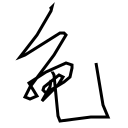

In [26]:

outdata=getChar(env,"232.pot_9F9F")

# Initialize the path string
paths = ""

# Iterate through the commands and parameters and construct the path string
for cmd, para in zip(outdata['command'], outdata['para']):
    paths += f"{cmd} {para[0]} {para[1]} "

# Remove the trailing space
paths = paths.strip()

# Print the result
print(paths)

svg_file=glyph_to_svg(paths)

from IPython.display import SVG, display

# Display SVG file

display(SVG(data=svg_file))

